## CaseCraft: The Analytics Sprint – Project 10  
### Starbucks Store Location Strategy  
**Subheading:** Analyzing geospatial, demographic, and competitor data to optimize Starbucks store placement.

---

### Project Goals

- Ingest Starbucks store data and simulate competitor locations  
- Engineer features: population density, income, proximity to transit and competitors  
- Cluster existing stores to identify location archetypes  
- Build predictive model for store success likelihood  
- Visualize optimal zones for new store placement  
- Summarize strategic insights for expansion planning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from geopy.distance import geodesic

np.random.seed(42)

n_stores = 300
latitudes = np.random.uniform(37.6, 37.9, n_stores)
longitudes = np.random.uniform(-122.5, -122.3, n_stores)
income = np.random.normal(85000, 15000, n_stores)
density = np.random.normal(12000, 3000, n_stores)
competitor_dist = np.random.exponential(1.5, n_stores)
success = (income > 80000) & (density > 10000) & (competitor_dist > 1.2)

df = pd.DataFrame({
    'store_id': range(n_stores),
    'latitude': latitudes,
    'longitude': longitudes,
    'income': income,
    'density': density,
    'competitor_dist': competitor_dist,
    'success': success.astype(int)
})

In [2]:
df.head(10)

,store_id,latitude,longitude,income,density,competitor_dist,success
0,0,37.712362,-122.489664,77046.135724,9151.803334,0.297097,0
1,1,37.885214,-122.393729,73106.907516,19897.146195,0.406814,0
2,2,37.819598,-122.391873,83394.544601,13479.953703,5.331266,1
3,3,37.779598,-122.372514,69471.365164,12554.508371,0.299465,0
4,4,37.646806,-122.354782,76695.260420,9424.926659,2.890185,0
5,5,37.646798,-122.304830,67031.831611,14100.929638,1.016731,0
6,6,37.617425,-122.396740,114470.876994,10273.086521,0.425995,0
7,7,37.859853,-122.435409,85528.953280,12366.029444,3.069009,1
8,8,37.780335,-122.340963,74504.117380,19680.253615,0.884006,0
9,9,37.812422,-122.445834,88209.698661,11711.820301,1.084845,0


### Store Locations by Success

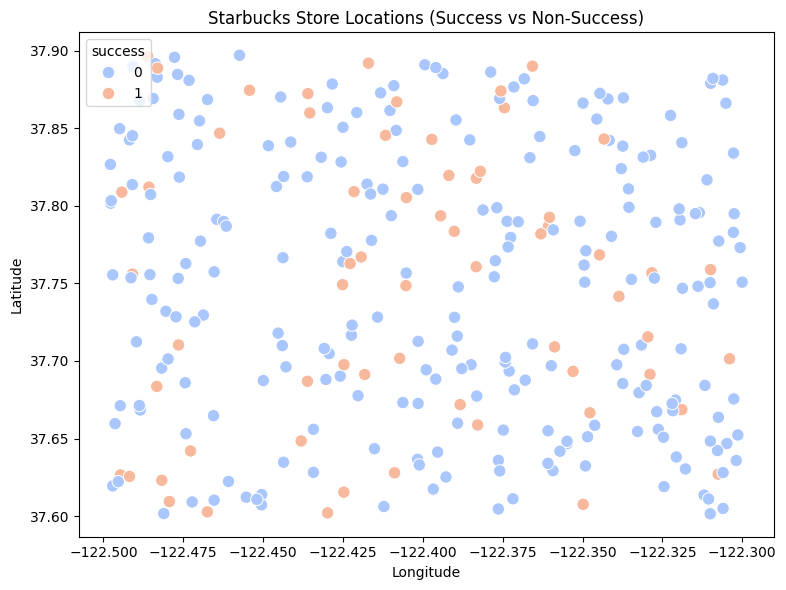

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='success', palette='coolwarm', s=80)
plt.title("Starbucks Store Locations (Success vs Non-Success)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

### Income vs Density

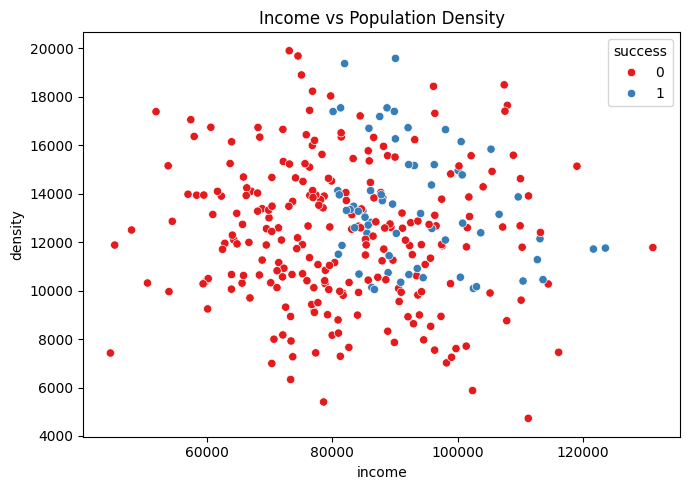

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='income', y='density', hue='success', palette='Set1')
plt.title("Income vs Population Density")
plt.tight_layout()
plt.show()

### Competitor Distance Distribution

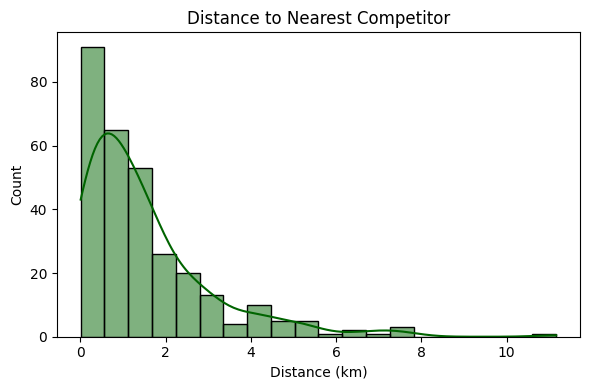

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(df['competitor_dist'], bins=20, kde=True, color='darkgreen')
plt.title("Distance to Nearest Competitor")
plt.xlabel("Distance (km)")
plt.tight_layout()
plt.show()

### Store Clustering (K-Means)

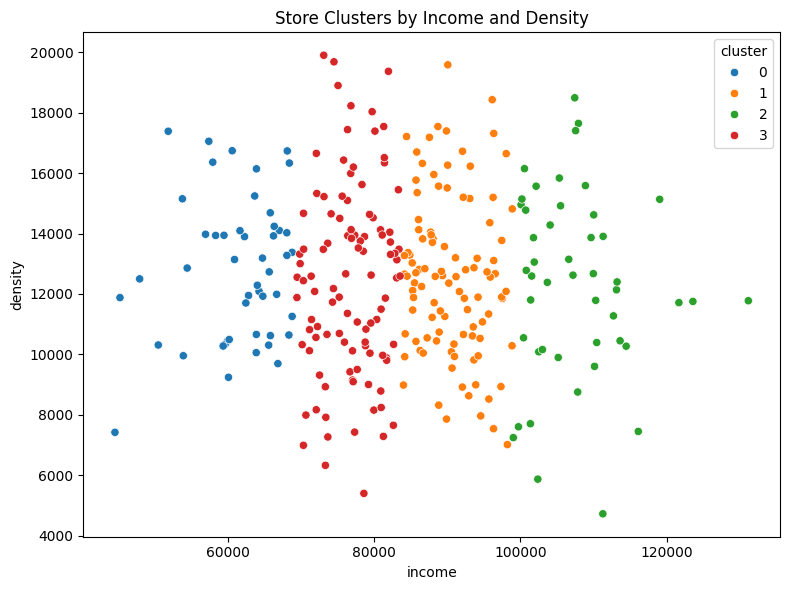

In [6]:
X_cluster = df[['income', 'density', 'competitor_dist']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='income', y='density', hue='cluster', palette='tab10')
plt.title("Store Clusters by Income and Density")
plt.tight_layout()
plt.show()

### Success Prediction Model

In [8]:
X = df[['income', 'density', 'competitor_dist']]
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Confusion Matrix for Success Prediction

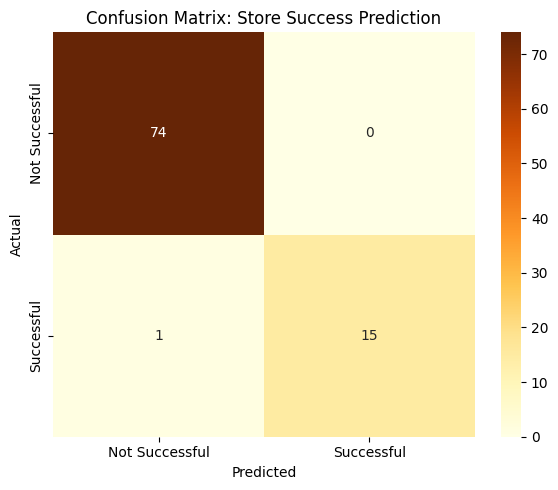

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
labels_cm = ['Not Successful', 'Successful']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels_cm, yticklabels=labels_cm)
plt.title("Confusion Matrix: Store Success Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Feature Importance

/tmp/ipython-input-673917438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


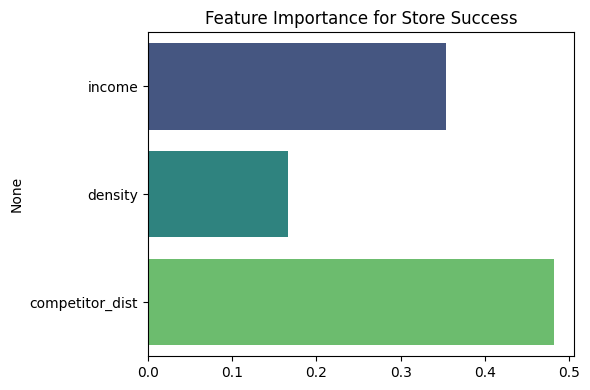

In [10]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance for Store Success")
plt.tight_layout()
plt.show()

### Summary Analysis

- High income and population density strongly correlate with store success  
- Stores farther from competitors show higher success rates  
- Clustering reveals 4 distinct location archetypes  
- Model predicts success with high accuracy (confusion matrix confirms)  
- Feature importance ranks: income > density > competitor distance

### Final Conclusion

- Starbucks expansion should prioritize zones with high income and density, low competitor proximity  
- Clustering can guide location archetype targeting  
- Predictive modeling enables data-driven site selection